In [69]:
library(psych)
library(ISLR)
library(ggplot2)
library(GGally)
library(gridExtra)
library(cowplot)
library(lattice)
library(randomForest)
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:randomForest':

    combine


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [35]:
data=read.csv("train.csv")

In [36]:
test = read.csv("test.csv")

In [37]:
str(data)

'data.frame':	7008 obs. of  14 variables:
 $ Date                 : chr  "13/03/2018" "15/03/2018" "29/11/2018" "4/04/2018" ...
 $ Rented.Bike.Count    : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour                 : int  14 14 5 9 17 10 8 1 20 18 ...
 $ Temperature          : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity             : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed           : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility           : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ Dew.point.temperature: num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ Solar.Radiation      : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : chr  "Spring" "Spring" "Autumn" "Spring" ...
 $ Holiday              : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ Function

In [38]:
dim(data)

[1] 7008   14

In [39]:
# changing Hour, Seasons, Holiday, Functioning.Day to factor as they are categorical variables

data$Seasons <- as.factor(data$Seasons) 
data$Holiday <- as.factor(data$Holiday) 
data$Functioning.Day <- as.factor(data$Functioning.Day) 
data$Hour <- as.factor(data$Hour) 

# changing a few names

# Rented.Bike.Count = BikeCount
# Temperature = Temp
# Dew.point.temperature = DPtemp
# Solar.Radiation = SR
# Functioning.Day = Fday



names(data)[c(2,4,8,9,14)]<-c("BikeCount","Temp","DPtemp", "SR","Fday")




In [40]:
#doing same converions for test data

# changing Hour, Seasons, Holiday, Functioning.Day to factor as they are categorical variables

test$Seasons <- as.factor(test$Seasons) 
test$Holiday <- as.factor(test$Holiday) 
test$Functioning.Day <- as.factor(test$Functioning.Day) 
test$Hour <- as.factor(test$Hour) 

# changing a few names

# Rented.Bike.Count = BikeCount
# Temperature = Temp
# Dew.point.temperature = DPtemp
# Solar.Radiation = SR
# Functioning.Day = Fday



names(test)[c(2,4,8,9,14)]<-c("BikeCount","Temp","DPtemp", "SR","Fday")


In [6]:
str(data)

'data.frame':	7008 obs. of  14 variables:
 $ Date      : chr  "13/03/2018" "15/03/2018" "29/11/2018" "4/04/2018" ...
 $ BikeCount : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour      : Factor w/ 24 levels "0","1","2","3",..: 15 15 6 10 18 11 9 2 21 19 ...
 $ Temp      : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity  : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed: num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility: int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ DPtemp    : num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ SR        : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall  : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons   : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...
 $ Holiday   : Factor w/ 2 levels "Holiday","No Holiday": 2 2 2 2 1 2 2 2 2 2 ...
 $ Fday      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...


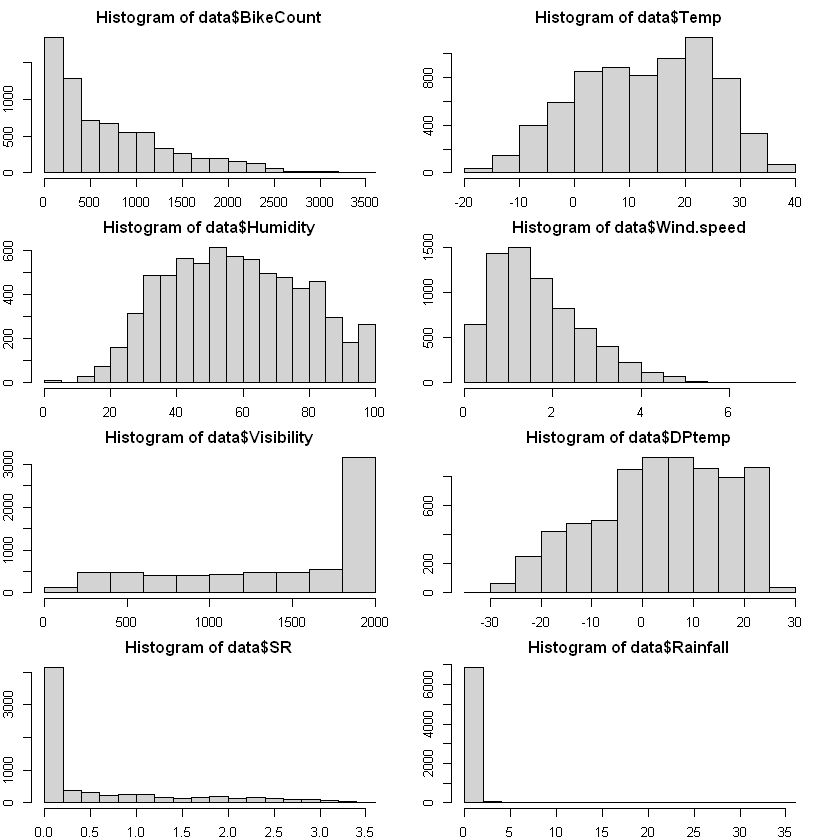

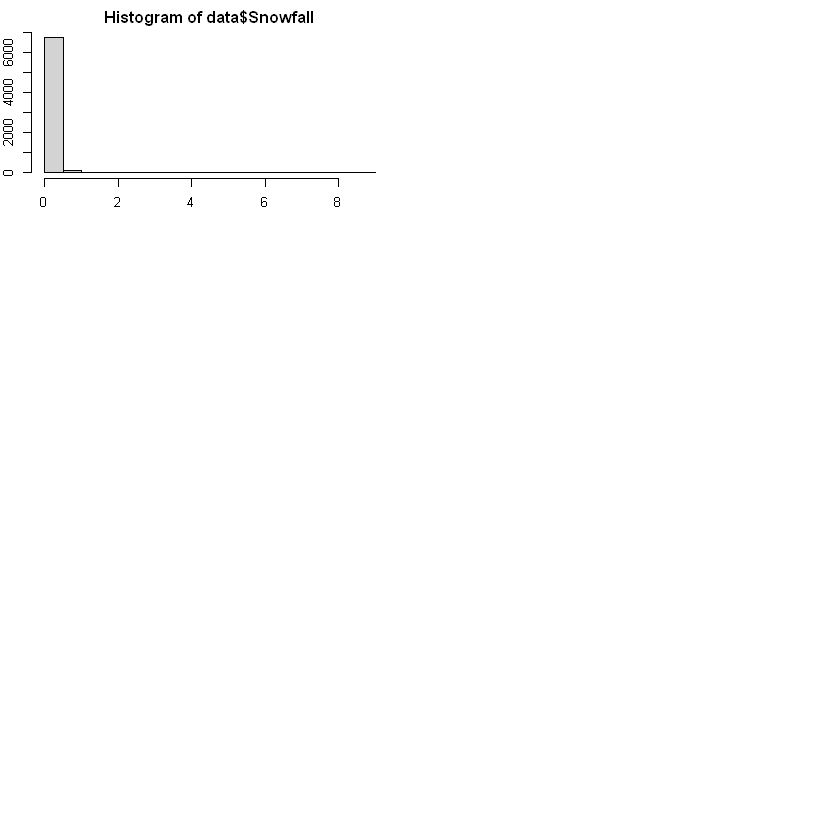

In [7]:
par(mfrow=c(4,2))
par(mar = rep(2, 4))
hist(data$BikeCount)
hist(data$Temp)
hist(data$Humidity)
hist(data$Wind.speed)
hist(data$Visibility)
hist(data$DPtemp)
hist(data$SR)
hist(data$Rainfall)
hist(data$Snowfall)



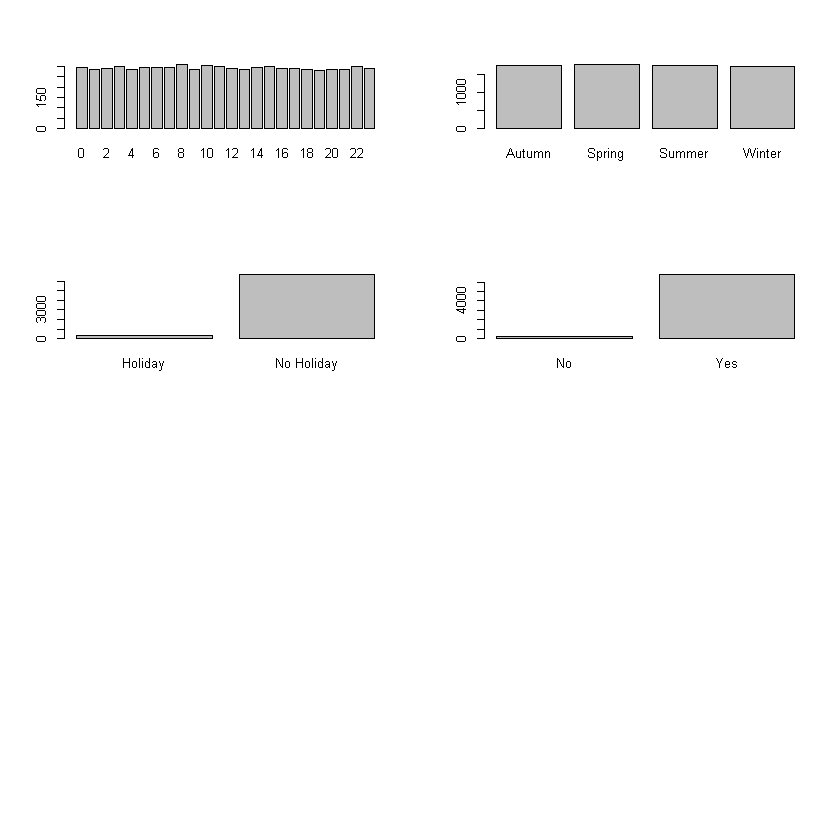

In [8]:
# visualising the categorical variables

par(mfrow=c(4,2))
barplot(table(data$Hour))

barplot(table(data$Seasons))
barplot(table(data$Holiday))
barplot(table(data$Fday))


#inference

#1. similar distribution of bikecounts over all hours, and seasons
#2.functioning day has way more on yes, holiday has way more on no holiday

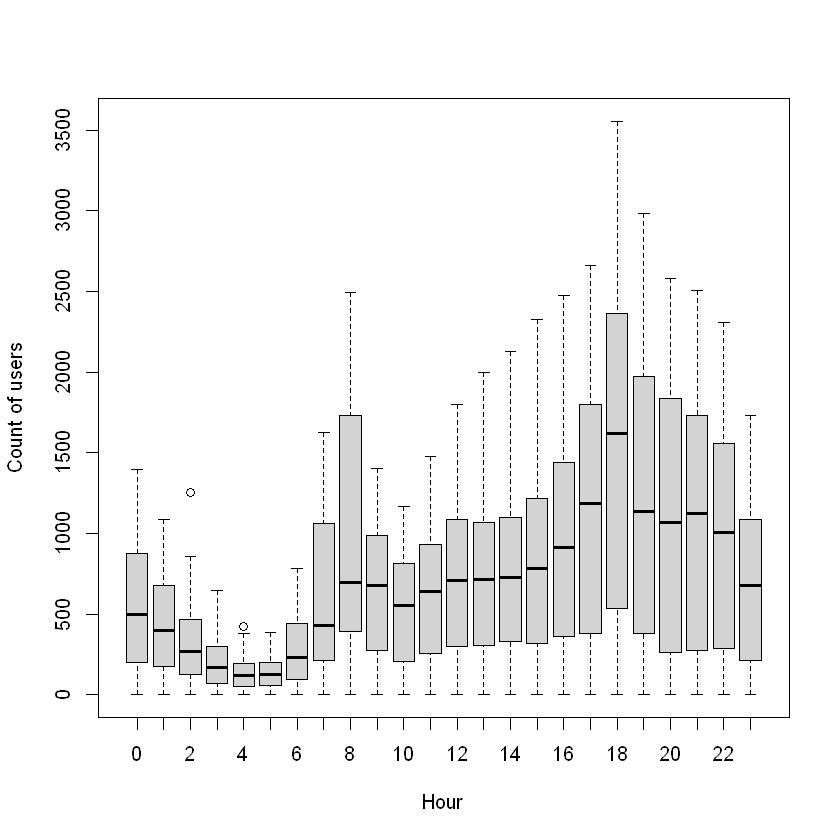

In [9]:
# distributions of users for each hour in the day


boxplot(data$BikeCount~data$Hour,xlab="Hour", ylab="Count of users")

#inference

# fairly low avg bike counts from 0-7 hours, moderate from 8-16, 17-22 high peaking at 18, 

In [10]:
# removing date

data$Date = NULL

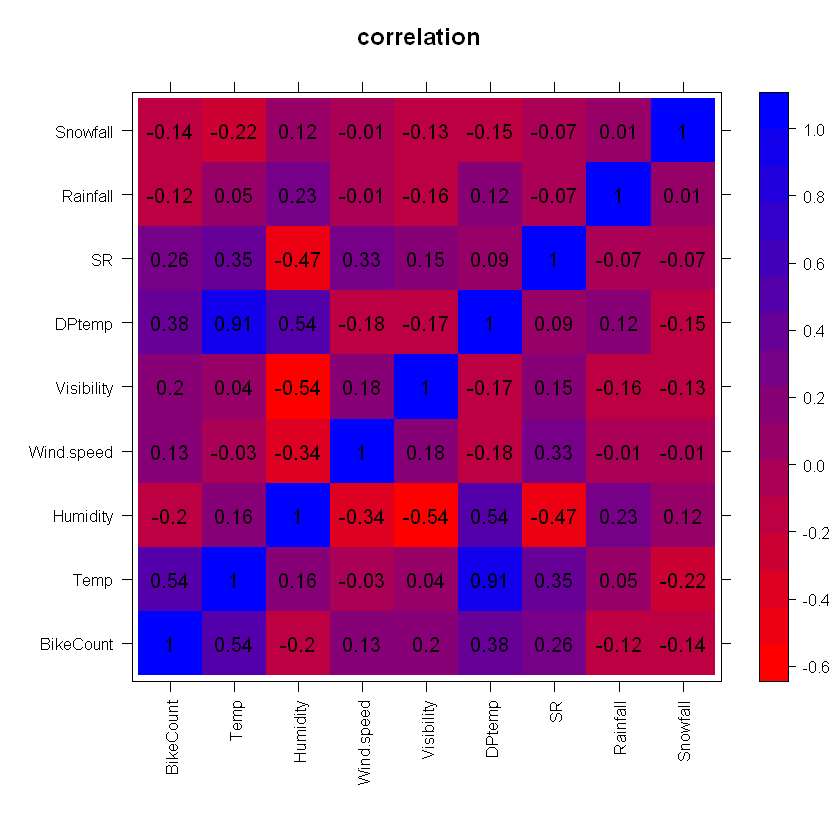

In [11]:
#Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("red","blue"))
#Plot the correlation matrix.
levelplot(round(cor(data[c(1, 3:10)]),3), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

In [12]:
#inference


# high correlation between temp and dptemp, 
# temp, dptemp, sr positive correlation with response variable
# humidity, rainfall, snowfall, negative coorrelation
# windspeed not very correlated with response variable

In [ ]:
# here im taking log(BikeCount+1) to log transform the count as the response variable BikeCount has natural outliers

In [21]:
set.seed(999)
forest <- randomForest(log(BikeCount+1) ~Hour + Temp
                     +Humidity+Wind.speed+Visibility+
                     DPtemp+SR+Rainfall+Snowfall+Seasons+
                     Holiday+Fday, data=data,importance=TRUE, ntree=250)




In [22]:
forest


Call:
 randomForest(formula = log(BikeCount + 1) ~ Hour + Temp + Humidity +      Wind.speed + Visibility + DPtemp + SR + Rainfall + Snowfall +      Seasons + Holiday + Fday, data = data, importance = TRUE,      ntree = 250) 
               Type of random forest: regression
                     Number of trees: 250
No. of variables tried at each split: 4

          Mean of squared residuals: 0.1902007
                    % Var explained: 92.45

In [28]:
prediction=predict(forest,test)
test$logBikeCount=prediction

In [33]:
test$predictedBikeCount=round(exp(test$logBikeCount),digits=0)-1

In [34]:
test

Date,BikeCount,Hour,Temp,Humidity,Wind.speed,Visibility,DPtemp,SR,Rainfall,Snowfall,Seasons,Holiday,Fday,logreg,logBikeCount,predictedBikeCount
<chr>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1/12/2017,360,11,-0.5,21,1.3,1936,-20.2,0.94,0,0.0,Winter,No Holiday,Yes,5.432163,5.432163,228
1/12/2017,862,18,0.6,66,1.4,2000,-5.0,0.00,0,0.0,Winter,No Holiday,Yes,6.031699,6.031699,415
1/12/2017,323,23,-1.3,84,1.0,1265,-3.6,0.00,0,0.0,Winter,No Holiday,Yes,5.347857,5.347857,209
2/12/2017,89,4,-3.8,79,2.0,1167,-6.9,0.00,0,0.0,Winter,No Holiday,Yes,4.073991,4.073991,58
2/12/2017,219,8,-4.2,79,2.1,1436,-7.3,0.01,0,0.0,Winter,No Holiday,Yes,5.841529,5.841529,343
2/12/2017,479,12,4.3,41,1.3,1666,-7.8,1.09,0,0.0,Winter,No Holiday,Yes,5.925099,5.925099,373
2/12/2017,589,15,7.6,41,2.3,1953,-4.8,0.74,0,0.0,Winter,No Holiday,Yes,6.179439,6.179439,482
2/12/2017,572,17,6.0,51,2.5,1891,-3.3,0.06,0,0.0,Winter,No Holiday,Yes,6.197486,6.197486,491
2/12/2017,489,18,5.5,53,1.5,1697,-3.3,0.00,0,0.0,Winter,No Holiday,Yes,6.104659,6.104659,447


In [43]:
# install.packages('datetime')

In [64]:
library(datetime)
library(scales)

Warning message:
"package 'scales' was built under R version 4.0.2"

Attaching package: 'scales'


The following objects are masked from 'package:psych':

    alpha, rescale




In [60]:
## Day of the Week
data$Date = substr(data$Date,1,10)
days<-weekdays(as.Date(data$Date))
data$days=days
data$days <- factor(data$days, levels=c("Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))

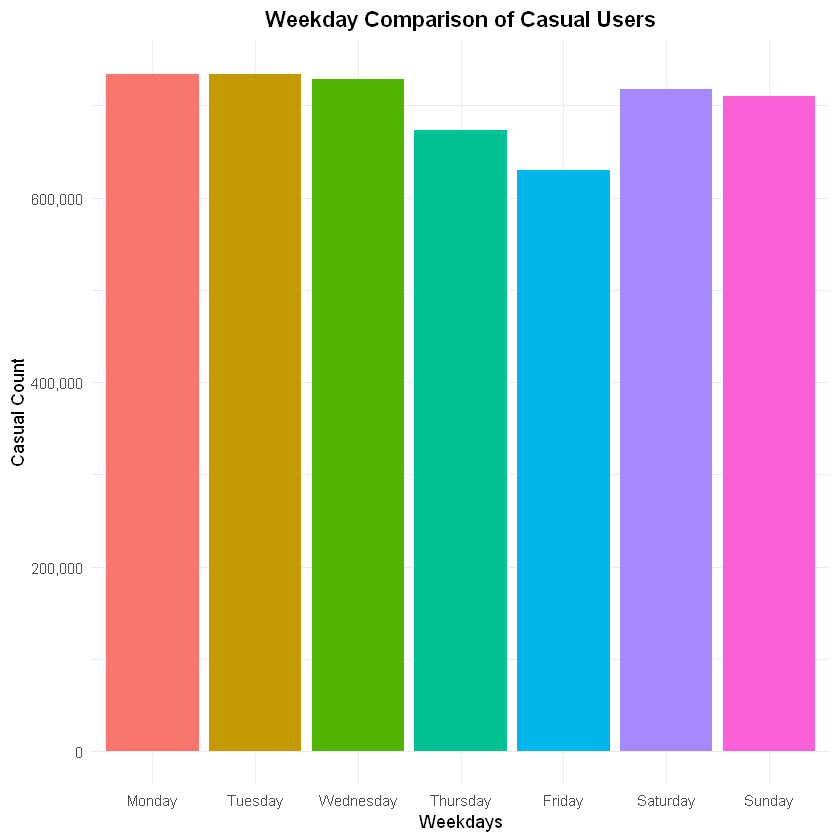

In [65]:
## Weekdays Graph
ggplot(data=data, aes(x = days, y=BikeCount, fill=days))+
geom_bar(stat = "identity")+
ggtitle(label = "Weekday Comparison of Casual Users")+
theme_minimal()+theme(plot.title = element_text(hjust = 0.5, lineheight = 0.8, face = "bold"),legend.position = "none")+
xlab("Weekdays")+ylab("Casual Count")+ scale_y_continuous(labels = comma)

# Model Deployment and Predcition

In [70]:
data = data %>% dplyr::mutate_if(is.factor, as.numeric)

In [72]:
str(data)

'data.frame':	7008 obs. of  15 variables:
 $ Date      : chr  "13/03/2018" "15/03/2018" "29/11/2018" "4/04/2018" ...
 $ BikeCount : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour      : num  15 15 6 10 18 11 9 2 21 19 ...
 $ Temp      : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity  : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed: num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility: int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ DPtemp    : num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ SR        : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall  : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons   : num  2 2 1 2 4 2 3 1 2 3 ...
 $ Holiday   : num  2 2 2 2 1 2 2 2 2 2 ...
 $ Fday      : num  2 2 2 2 2 2 2 2 2 2 ...
 $ days      : num  3 5 2 2 5 1 2 6 4 5 ...


In [73]:
data$logBikeCount <- log(data$BikeCount + 1)

In [75]:
set.seed(999)

forest1 <- randomForest(logBikeCount ~ Seasons + Holiday + Hour + Temp +
                        Humidity + Wind.speed + Visibility + DPtemp +
                        SR + Rainfall + Snowfall + Fday + days, data = data)

forest1


Call:
 randomForest(formula = logBikeCount ~ Seasons + Holiday + Hour +      Temp + Humidity + Wind.speed + Visibility + DPtemp + SR +      Rainfall + Snowfall + Fday + days, data = data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 0.1728626
                    % Var explained: 93.14

In [76]:
# Predict
predict1 <- predict(forest1, test)
summary(forest1)

Warning message:
"'newdata' had 1752 rows but variables found have 7008 rows"


ERROR: Error in model.frame.default(Terms, newdata, na.action = na.omit): variable lengths differ (found for 'days')
